# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold,train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import  LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from joblib import dump, load
import warnings
warnings.filterwarnings('ignore')

In [2]:
url = 'https://drive.google.com/uc?id=1yXhMGfaElSHpjz5CXa9UxAtV7A7i14hl'

In [3]:
df=pd.read_csv(url)

In [4]:
df.head()

,Review,Sentiment
0,Fast shipping but this product is very cheaply...,1
1,This case takes so long to ship and it's not e...,1
2,Good for not droids. Not good for iPhones. You...,1
3,The cable was not compatible between my macboo...,1
4,The case is nice but did not have a glow light...,1


# Handling Missing Values

In [5]:
df.isnull().sum()

Review       1
Sentiment    0
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.isnull().sum()

Review       0
Sentiment    0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24999 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Review     24999 non-null  object
 1   Sentiment  24999 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 585.9+ KB


In [9]:
df.Sentiment.unique()

array([1, 2, 3, 4, 5])

In [10]:
df.Sentiment.value_counts()

Sentiment
1    5000
2    5000
3    5000
4    5000
5    4999
Name: count, dtype: int64

# Binary Encoding

In [11]:
df.Sentiment.replace([1,2,3],0,inplace=True)
df.Sentiment.replace([4,5],1,inplace=True)

In [12]:
df.Sentiment.unique()

array([0, 1])

# Text Preprocessing.

In [13]:
nltk.download("stopwords")
nltk.download("wordnet")

[nltk_data] Downloading package stopwords to /home/imran/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/imran/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [14]:
lm=WordNetLemmatizer()

In [15]:
clean_review=[]
for i in df.Review:
    text=re.findall(r"\b[a-zA-Z]+\b",i.lower())
    clean_review.append(" ".join(lm.lemmatize(j) for j in text if j not in stopwords.words("english")))

In [16]:
clean_review[:3]

['fast shipping product cheaply made brought grandchild ipod would protected fell skin suitable protection good decoration therefore rated',
 'case take long ship even worth dont buy',
 'good droids good iphones cannot use feature watch iphone synch iphone']

# Creating WordCloud

In [17]:
word=" "
for i in clean_review:
    for j in i:
        word+=" ".join(j)

In [18]:
len(word)

5376416

In [19]:
wc=WordCloud(width=3000,height=1600,min_font_size=10).generate(word)

(-0.5, 2999.5, 1599.5, -0.5)

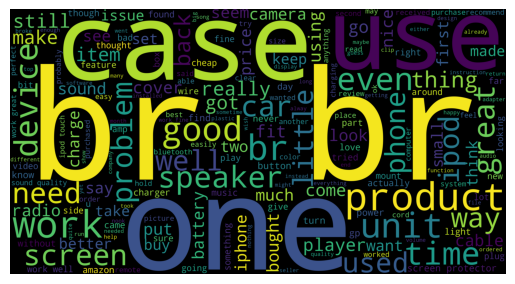

In [20]:
plt.imshow(wc)
plt.axis(False)

# Spliting Data

In [21]:
data=pd.DataFrame({"text":clean_review,"target":df.Sentiment})

In [22]:
x=data.text
y=data.target

In [23]:
skf=StratifiedKFold(n_splits=5)

In [24]:
for train_index,test_index in skf.split(clean_review,df.Sentiment):
    x_train,x_test=x.iloc[train_index],x.iloc[test_index]
    y_train,y_test=y.iloc[train_index],y.iloc[test_index]

# Text Vectorization

In [25]:
vectorizer = TfidfVectorizer()
x_train_tfidf = vectorizer.fit_transform(x_train)
x_test_tfidf = vectorizer.transform(x_test)

# Builiding Models

# RandomForestClassifier

In [26]:
%%time
rf=RandomForestClassifier(n_estimators = 100) 
rf.fit(x_train_tfidf,y_train)

CPU times: user 1min 25s, sys: 170 ms, total: 1min 26s
Wall time: 1min 26s


RandomForestClassifier()

In [27]:
y_prd=rf.predict(x_test_tfidf)

In [28]:
accuracy_score(y_test,y_prd)

0.7409481896379276

In [29]:
confusion_matrix(y_test,y_prd)

array([[2188,  812],
       [ 483, 1516]])

In [30]:
print(classification_report(y_test,y_prd))

              precision    recall  f1-score   support

           0       0.82      0.73      0.77      3000
           1       0.65      0.76      0.70      1999

    accuracy                           0.74      4999
   macro avg       0.74      0.74      0.74      4999
weighted avg       0.75      0.74      0.74      4999



# LogisticRegression

In [31]:
from sklearn.linear_model import  LogisticRegression

In [32]:
lr=LogisticRegression()

In [33]:
%%time
lr.fit(x_train_tfidf,y_train)

CPU times: user 547 ms, sys: 37 ms, total: 584 ms
Wall time: 528 ms


LogisticRegression()

In [34]:
lr_y_prd=lr.predict(x_test_tfidf)

In [35]:
accuracy_score(y_test,lr_y_prd)

0.7395479095819164

In [36]:
confusion_matrix(y_test,lr_y_prd)

array([[2078,  922],
       [ 380, 1619]])

In [37]:
print(classification_report(y_test,lr_y_prd))

              precision    recall  f1-score   support

           0       0.85      0.69      0.76      3000
           1       0.64      0.81      0.71      1999

    accuracy                           0.74      4999
   macro avg       0.74      0.75      0.74      4999
weighted avg       0.76      0.74      0.74      4999



# Decision Tree

In [38]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
dtc=DecisionTreeClassifier()

In [40]:
%%time
dtc.fit(x_train_tfidf,y_train)

CPU times: user 20.5 s, sys: 45.3 ms, total: 20.5 s
Wall time: 20.6 s


DecisionTreeClassifier()

In [41]:
dtc_y_prd=lr.predict(x_test_tfidf)

In [42]:
accuracy_score(y_test,dtc_y_prd)

0.7395479095819164

In [43]:
confusion_matrix(y_test,dtc_y_prd)

array([[2078,  922],
       [ 380, 1619]])

In [44]:
print(classification_report(y_test,dtc_y_prd))

              precision    recall  f1-score   support

           0       0.85      0.69      0.76      3000
           1       0.64      0.81      0.71      1999

    accuracy                           0.74      4999
   macro avg       0.74      0.75      0.74      4999
weighted avg       0.76      0.74      0.74      4999



# Save the Model

In [45]:
dump(lr, 'lr_model.joblib')

['lr_model.joblib']